# Problem Statement:Predicting which species can grow at different locations depending on the environment.

# Importing the Libraries

In [1]:
# This is a supervised learning problem and since we need to find out which type of species survives the most in that 
# particular geographical location, it is a classification problem.
# Importing necessary libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from IPython.core.display import display, HTML
sns.set_style('darkgrid')
#ignore warnings for now
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
import time

In [2]:
# Importing the train and test dataset 
data_train = pd.read_csv('capstone_train.csv')
data_test = pd.read_csv('capstone_test.csv')

In [3]:
# data_train['Shadow_In_Midday'].fillna(data_train['Shadow_In_Midday'].mean(),inplace=True)
# data_test['Shadow_In_Midday'].fillna(data_test['Shadow_In_Midday'].mean(),inplace=True)

# 1. Create a report on key insights derived from Exploratory Data Analysis

# Exploratory Data Analysis

In [4]:
# checking the dimensions of the dataframe
print('The shape of the train dataset :',data_train.shape)
print('The shape of the test dataset :',data_test.shape)

The shape of the train dataset : (464809, 13)
The shape of the test dataset : (116203, 13)


In [5]:
# Sneakpeek into the train dataset
data_train.head()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
0,2984,87,10,234,62,3700,235,224.0,119,2751,29,1,Assassin vine
1,3021,283,31,630,372,2155,122,224.0,234,1519,13,3,Assassin vine
2,3357,164,14,618,151,1410,232,244.0,140,1866,32,3,Ascomoid
3,2787,272,16,150,40,2024,176,243.0,206,957,31,3,Assassin vine
4,3011,135,2,576,95,5550,222,238.0,151,1524,29,1,Assassin vine


In [6]:
# Sneakpeek into the test dataset
data_test.head()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
0,3258,225,2,631,148,1739,217,240.0,161,2340,31,3,Ascomoid
1,3033,229,24,552,341,2277,176,253.0,206,1318,13,3,Assassin vine
2,2838,355,20,108,21,674,183,201.0,152,418,31,3,Assassin vine
3,3098,122,10,242,76,4821,238,232.0,124,268,29,1,Assassin vine
4,3221,189,24,153,41,2121,214,250.0,157,1423,33,3,Ascomoid


In [7]:
# Summary of the train data.
print('Train Data')
print('---------------')
print(data_train.info()) # This command gives us the number of filled values along with the data types of columns.
# We can see that there are null values in Shadow_In_Midday.
print('Test Data')
print('---------------')
# Summary of the test data.
print(data_test.info()) # This command gives us the number of filled values along with the data types of columns.
# We can see that there are null values in Shadow_In_Midday even in test data as well.

Train Data
---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464809 entries, 0 to 464808
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Heigh_From_Sea_Level               464809 non-null  int64  
 1   Aspect                             464809 non-null  int64  
 2   Slope                              464809 non-null  int64  
 3   Distance_To_Water_Source           464809 non-null  int64  
 4   Standing_Distance_To_Water_Source  464809 non-null  int64  
 5   Distance_To_Road                   464809 non-null  int64  
 6   Shadow_In_Morning                  464809 non-null  int64  
 7   Shadow_In_Midday                   371776 non-null  float64
 8   Shadow_In_Evening                  464809 non-null  int64  
 9   Distance_To_Fire                   464809 non-null  int64  
 10  Turf                               464809 non-null  int64  
 11  Neighbourhoo

In [8]:
# Checking for the null values in the dataframe column wise:
print('Train Data')
print('---------------')
print(data_train.isnull().sum())
print('---------------')
print('Test Data')
print('---------------')
print(data_test.isnull().sum())
# We can see the count of null values in the Show_In_Midday both train and test data.
# This is more than 5% of the data available.

Train Data
---------------
Heigh_From_Sea_Level                     0
Aspect                                   0
Slope                                    0
Distance_To_Water_Source                 0
Standing_Distance_To_Water_Source        0
Distance_To_Road                         0
Shadow_In_Morning                        0
Shadow_In_Midday                     93033
Shadow_In_Evening                        0
Distance_To_Fire                         0
Turf                                     0
Neighbourhood_Type                       0
Plant_Type                               0
dtype: int64
---------------
Test Data
---------------
Heigh_From_Sea_Level                     0
Aspect                                   0
Slope                                    0
Distance_To_Water_Source                 0
Standing_Distance_To_Water_Source        0
Distance_To_Road                         0
Shadow_In_Morning                        0
Shadow_In_Midday                     23079
Shadow_In_Eveni

In [9]:
# sometimes there are things more than our eye meets.The neighbourhood types are ranging from 1-4.That means we cannot 
# have a value 0 for them.Same is the case with Turf where the values range from 1-40.SO, 0 is not acceptable.
# checking the same.
print('Train Data')
print('---------------')
print('Zero values in Turf:',len(data_train[data_train['Turf']==0]))
print('Zero values in Neighbourhood_Type :',len(data_train[data_train['Neighbourhood_Type']==0]))
print('Test Data')
print('---------------')
print('Zero values in Turf:',len(data_test[data_test['Turf']==0]))
print('Zero values in Neighbourhood_Type :',len(data_test[data_test['Neighbourhood_Type']==0]))

Train Data
---------------
Zero values in Turf: 0
Zero values in Neighbourhood_Type : 0
Test Data
---------------
Zero values in Turf: 0
Zero values in Neighbourhood_Type : 0


In [10]:
# For analysing label encoding the Plant Type
label_encoder = LabelEncoder()
def label_en(data):    
    print('unique values in Plant_Type-before encoding:',data['Plant_Type'].unique()) 
    data['Plant_Type']= label_encoder.fit_transform(data['Plant_Type'])  
    print('unique values in Plant_Type-after encoding:',data['Plant_Type'].unique()) 
print('Train Data')
print('---------------')       
label_en(data_train)
print('Test Data')
print('---------------')
label_en(data_test)

Train Data
---------------
unique values in Plant_Type-before encoding: ['Assassin vine' 'Ascomoid' 'Basidirond' 'Kelpie' 'Myconid:'
 'Hangman tree' 'Dark tree']
unique values in Plant_Type-after encoding: [1 0 2 5 6 4 3]
Test Data
---------------
unique values in Plant_Type-before encoding: ['Ascomoid' 'Assassin vine' 'Basidirond' 'Myconid:' 'Dark tree'
 'Hangman tree' 'Kelpie']
unique values in Plant_Type-after encoding: [0 1 2 6 3 4 5]


# UNIVARIATE ANALYSIS

Train Data
---------------
---------------
Turf
---------------
29    92232
23    46075
32    41990
33    36105
22    26855
10    26074
30    24304
12    23942
31    20441
24    17114
13    13946
38    12455
39    11079
11     9917
4      9915
20     7395
40     6986
2      5965
6      5263
3      3819
19     3200
17     2740
1      2411
16     2266
26     2044
35     1513
18     1512
34     1299
5      1287
9       922
27      882
28      770
21      658
14      481
25      380
37      248
8       142
36       90
7        89
15        3
Name: Turf, dtype: int64


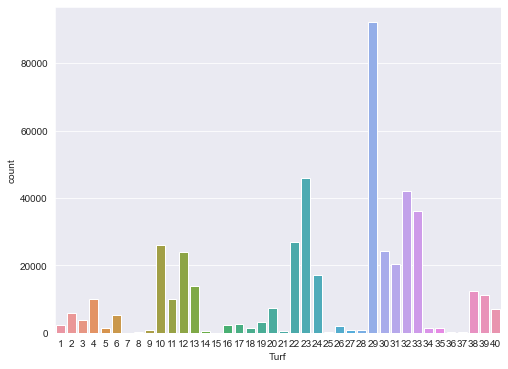

---------------
Neighbourhood_Type
---------------
1    208793
3    202660
4     29459
2     23897
Name: Neighbourhood_Type, dtype: int64


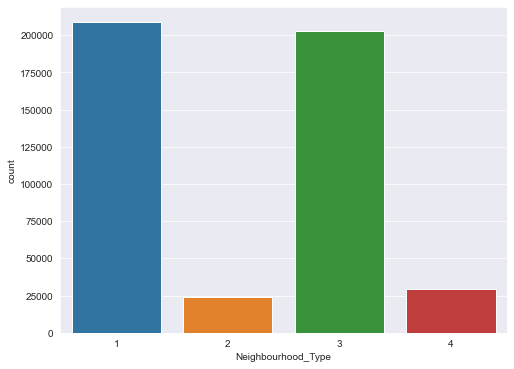

---------------
Plant_Type
---------------
1    226705
0    169487
2     28488
6     16416
5     13931
4      7598
3      2184
Name: Plant_Type, dtype: int64


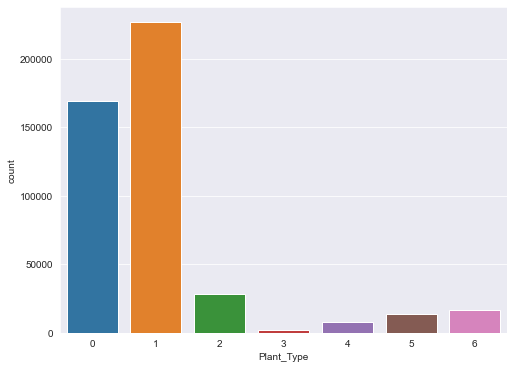

Test Data
---------------
---------------
Turf
---------------
29    23015
23    11677
32    10529
33     9049
10     6560
22     6518
12     6029
30     5866
31     5225
24     4164
13     3485
38     3118
39     2727
11     2493
4      2481
20     1864
40     1764
2      1560
6      1312
3      1004
19      821
17      682
1       620
16      579
26      545
18      387
35      378
34      312
5       310
9       225
27      204
21      180
28      176
14      118
25       94
37       50
8        37
36       29
7        16
Name: Turf, dtype: int64


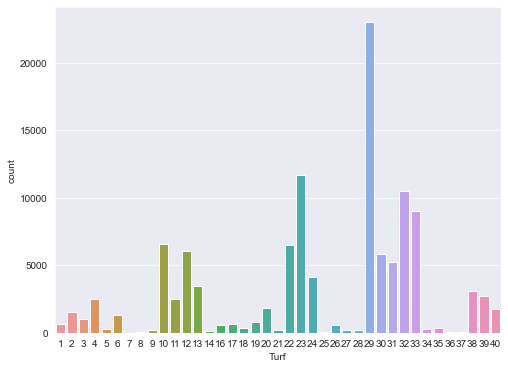

---------------
Neighbourhood_Type
---------------
1    52003
3    50704
4     7509
2     5987
Name: Neighbourhood_Type, dtype: int64


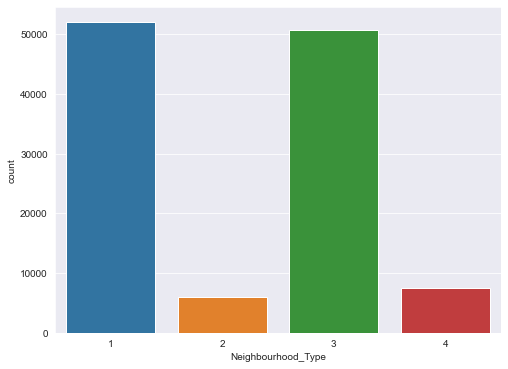

---------------
Plant_Type
---------------
1    56596
0    42353
2     7266
6     4094
5     3436
4     1895
3      563
Name: Plant_Type, dtype: int64


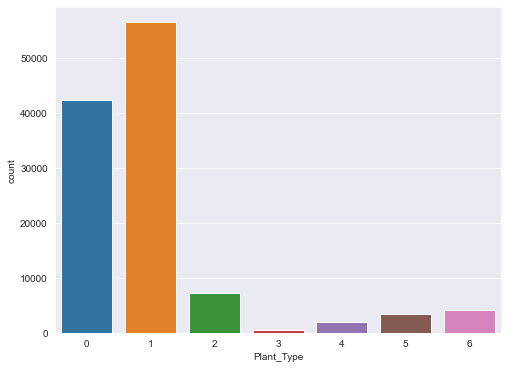

In [11]:
# Checking the concentration of values for categorical variables
columns=['Turf', 'Neighbourhood_Type','Plant_Type']
def freq_plot(data):
    for i in columns:
        print('---------------') 
        print(i)
        print('---------------') 
        print(data[i].value_counts().sort_values(ascending=False))
        # Visualizing the frequency distribution of dependent variable
        f, ax = plt.subplots(figsize=(8, 6))
        ax = sns.countplot(x=i, data=data)
        plt.show()

print('Train Data')
print('---------------')       
freq_plot(data_train)
print('Test Data')
print('---------------')
freq_plot(data_test)
# We can observe that Plant_Type has most values concentrated in the 
# categories 1 & 0 and few observations in the categories 4 & 3.

Analysis from above visualizations:<br><br>
Train data:<br><br>
1.Turf: No observations are missing in any of the categories.Major concentration of values are in the categories        29,23,32<br><br>
2.Neighbourhood:No observations are missing in any of the categories.Major concentration of values are in the                  categories 1 & 3<br><br>
3.Plant_Type:No observations are missing in any of the categories.Major concentration of values are in the                  categories 0 & 1<br><br>
<br><br>
Test data:<br><br>
1.Turf: CATEGORY 15 is missing in Turf attribute of test data.Major concentration of values are in the categories 29,23,32<br><br>
2.Neighbourhood:No observations are missing in any of the categories.Major concentration of values are in the                  categories 1 & 3<br><br>
3.Plant_Type:No observations are missing in any of the categories.Major concentration of values are in the                  categories 0 & 1<br><br>


Looking into the statisctical properties of dataset

In [12]:
# data.describe(include='all')
print('Train data:')
data_train.describe()

Train data:


,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
count,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,371776.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000
mean,2959.483063,155.661235,14.099759,269.290644,46.390412,2351.779462,212.157323,223.311841,142.518338,1980.473990,24.370455,2.113563,1.051563
std,279.781777,111.919973,7.486816,212.411427,58.240912,1559.868239,26.775574,19.744363,38.273670,1325.289344,9.478907,1.061051,1.397023
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,20.000000,1.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1998.000000,218.000000,226.000000,143.000000,1710.000000,29.000000,2.000000,1.000000
75%,3163.000000,261.000000,18.000000,384.000000,69.000000,3331.000000,231.000000,237.000000,168.000000,2550.000000,31.000000,3.000000,1.000000
max,3858.000000,360.000000,65.000000,1390.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,40.000000,4.000000,6.000000


In [13]:
print('Test data:')
data_test.describe()

Test data:


,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
count,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,93124.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000
mean,2958.894254,155.639097,14.119481,269.978503,46.532628,2343.615251,212.100953,223.332374,142.567963,1979.560175,24.330396,2.118061,1.051100
std,280.795803,111.889190,7.493954,213.100200,58.512119,1556.788570,26.747203,19.825772,38.278104,1319.815068,9.511329,1.062266,1.394434
min,1871.000000,0.000000,0.000000,0.000000,-166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2808.000000,58.000000,9.000000,108.000000,7.000000,1101.000000,198.000000,213.000000,119.000000,1025.000000,20.000000,1.000000,0.000000
50%,2997.000000,127.000000,13.000000,218.000000,29.000000,1991.000000,218.000000,226.000000,143.000000,1711.000000,29.000000,3.000000,1.000000
75%,3164.000000,260.000000,18.000000,390.000000,69.000000,3315.000000,231.000000,237.000000,168.000000,2552.000000,31.000000,3.000000,1.000000
max,3858.000000,360.000000,66.000000,1397.000000,597.000000,7116.000000,254.000000,254.000000,252.000000,7145.000000,40.000000,4.000000,6.000000


In [14]:
# Both the train and test data has skewness.This is evident from the following table where for some attributes mean>median(right skewed)
# while the other attributes have mean<median(left skewed).
# There are outliers as well which is indicated by the significant difference between the max and 75%.
# Visualizing these observations through plots in the following steps.

# Analysing the data distribution(Skewness)

---------------
Train Data
---------------
skewness of Heigh_From_Sea_Level: -0.8170188901728388
moderately skewed data


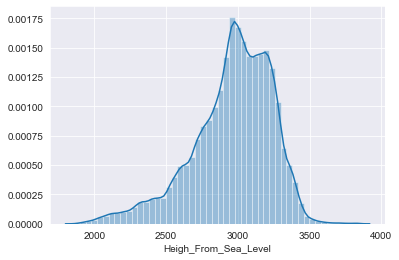

skewness of Aspect: 0.40309876892307517
approximately symmetric data


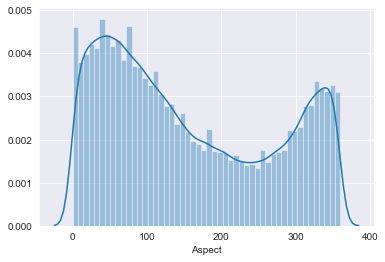

skewness of Slope: 0.7890688021313401
moderately skewed data


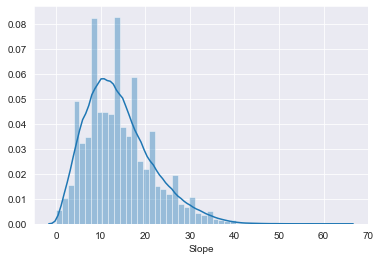

skewness of Distance_To_Water_Source: 1.1404873131886253
highly skewed data


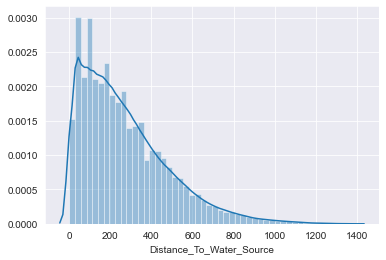

skewness of Standing_Distance_To_Water_Source: 1.7936129458476855
highly skewed data


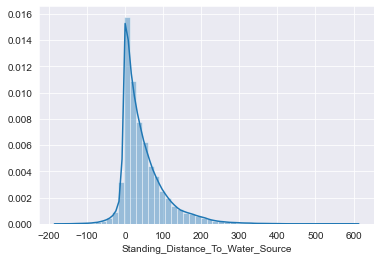

skewness of Distance_To_Road: 0.7119271364420248
moderately skewed data


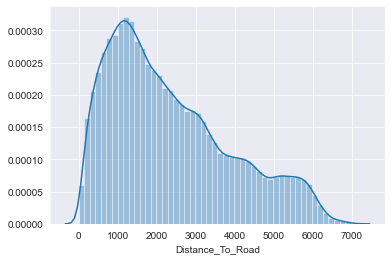

skewness of Shadow_In_Morning: -1.1811433749108495
highly skewed data


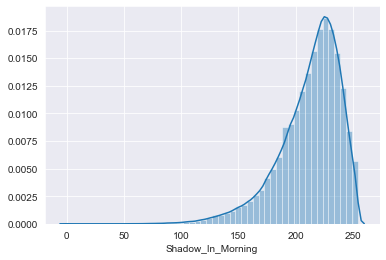

skewness of Shadow_In_Midday: -1.0609518255996568
highly skewed data


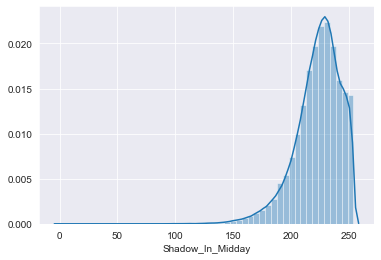

skewness of Shadow_In_Evening: -0.2748353256258127
approximately symmetric data


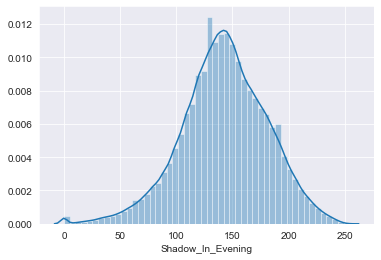

skewness of Distance_To_Fire: 1.2889510312455503
highly skewed data


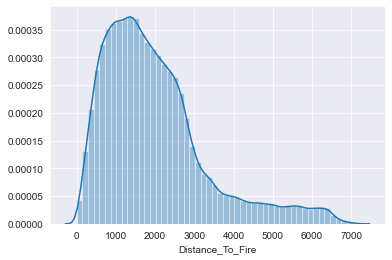

skewness of Turf: -0.7049442697135663
moderately skewed data


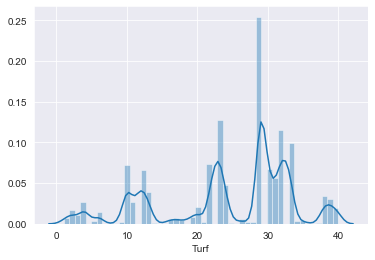

skewness of Neighbourhood_Type: 0.0910919709780078
approximately symmetric data


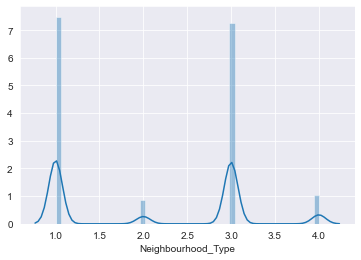

skewness of Plant_Type: 2.2763303447210608
highly skewed data


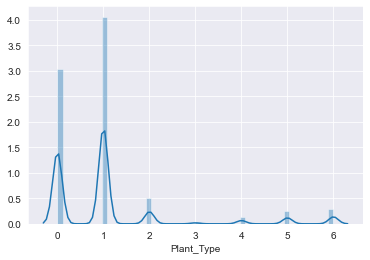

---------------
Test Data
---------------
skewness of Heigh_From_Sea_Level: -0.81984447289463
moderately skewed data


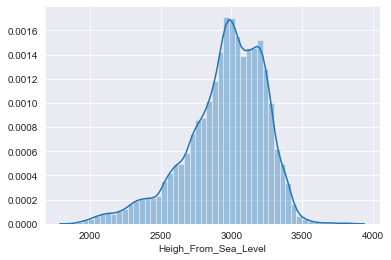

skewness of Aspect: 0.40074986562741693
approximately symmetric data


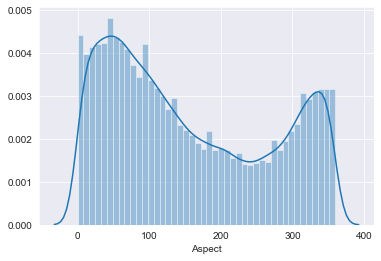

skewness of Slope: 0.7900890996053104
moderately skewed data


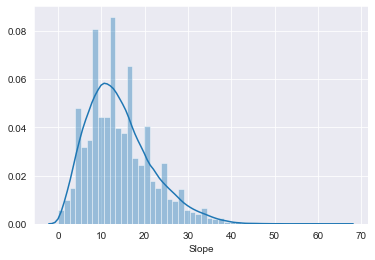

skewness of Distance_To_Water_Source: 1.1402043351738864
highly skewed data


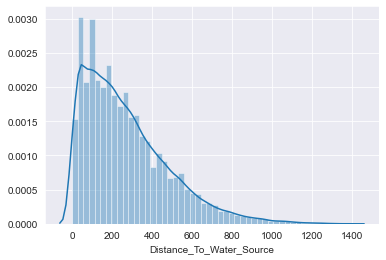

skewness of Standing_Distance_To_Water_Source: 1.7769187380039984
highly skewed data


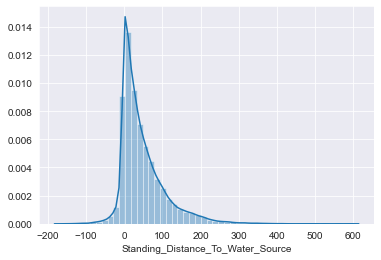

skewness of Distance_To_Road: 0.7207069163033758
moderately skewed data


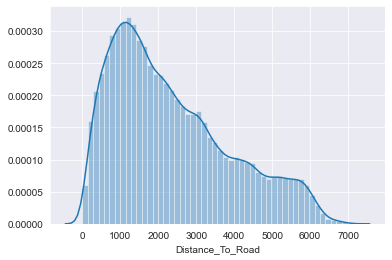

skewness of Shadow_In_Morning: -1.181190571875067
highly skewed data


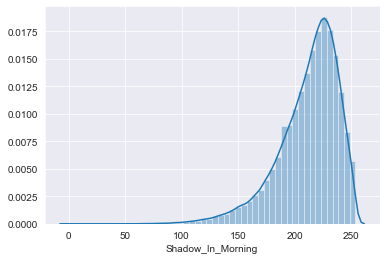

skewness of Shadow_In_Midday: -1.076255142083098
highly skewed data


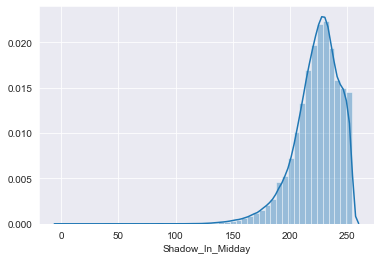

skewness of Shadow_In_Evening: -0.28592654843075205
approximately symmetric data


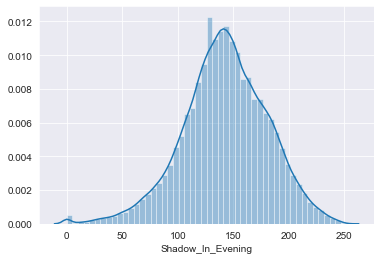

skewness of Distance_To_Fire: 1.287377806507275
highly skewed data


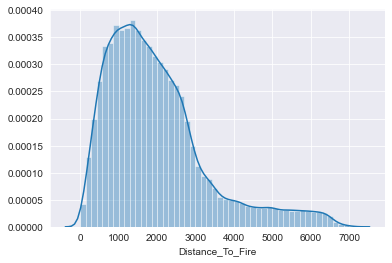

skewness of Turf: -0.7015526801463933
moderately skewed data


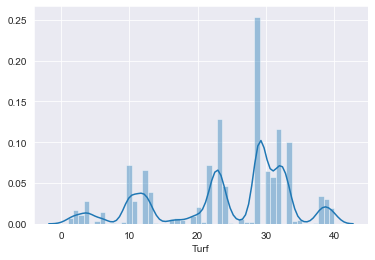

skewness of Neighbourhood_Type: 0.08716110189392708
approximately symmetric data


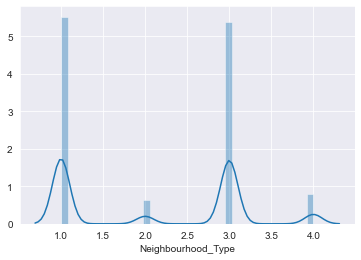

skewness of Plant_Type: 2.2775697305343323
highly skewed data


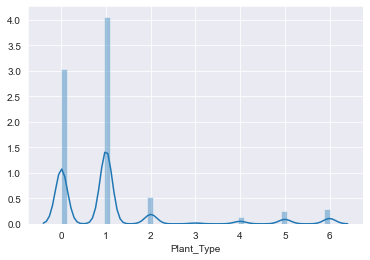

In [15]:
# # Analysing the data distribution - skewness of data through distplot(visual check for the analysis above)
# # skew is greater than 0 indicates right skewed(tail extends to the right)
# # skew is less than 0 indicates left skewed(tail extends to the left)
# # skew is equal to 0 indicates symmetric distribution
# # If skewness is less than -1 or greater than 1, the distribution is highly skewed.
# # If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
# # If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
def plot_skew(data):
    for i in data.columns: 
        skew_val = data[i].skew()
        print('skewness of '+i+':',skew_val)
        if(skew_val< -1 or skew_val>1):
            print('highly skewed data')
        elif((skew_val> -1 and skew_val<-0.5) or (skew_val> 0.5 and skew_val<1)):
            print('moderately skewed data')
        elif(skew_val> -0.5 and skew_val<0.5 ):
            print('approximately symmetric data')
        sns.distplot(data[i])
        plt.show()
#     stats.probplot(data[i], plot=plt) 
print('---------------')
print('Train Data')
print('---------------')   
plot_skew(data_train)
print('---------------')
print('Test Data')
print('---------------')
plot_skew(data_test)

# Analysing the outliers

---------------
Train Data
---------------


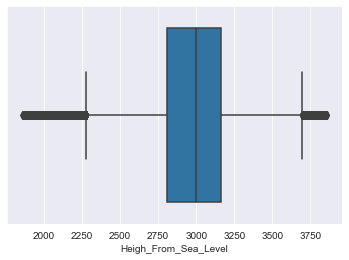

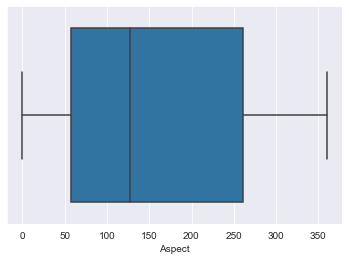

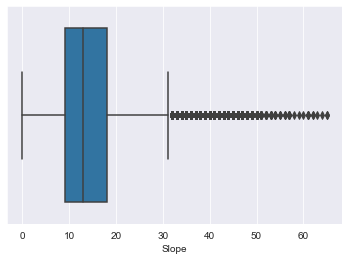

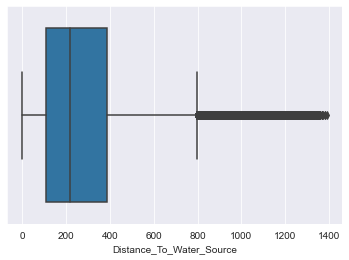

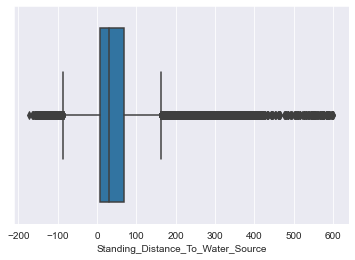

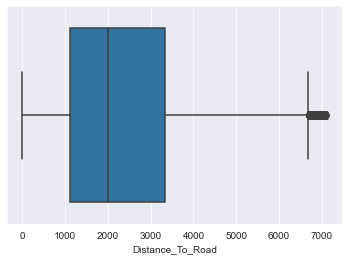

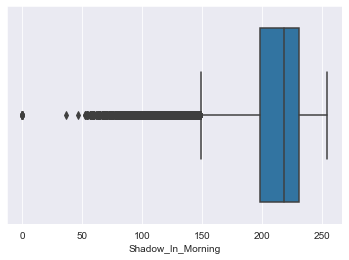

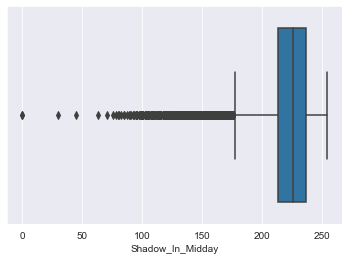

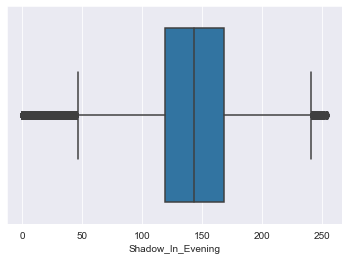

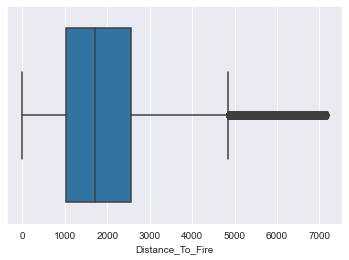

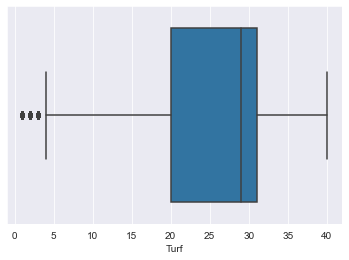

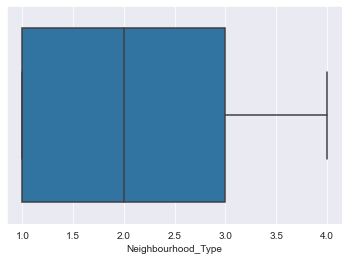

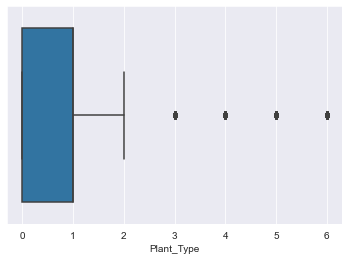

---------------
Test Data
---------------


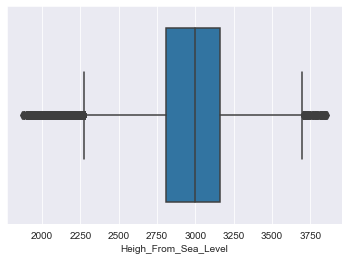

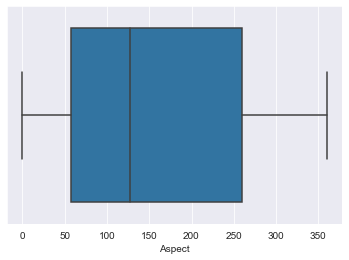

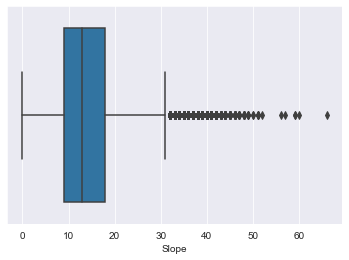

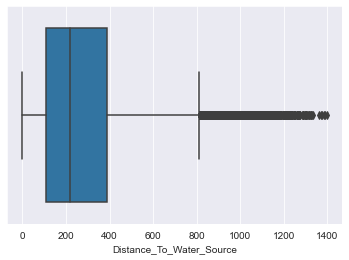

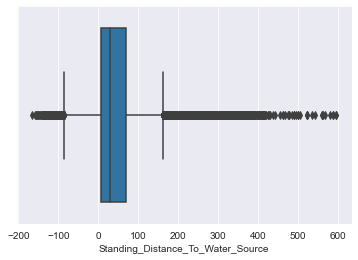

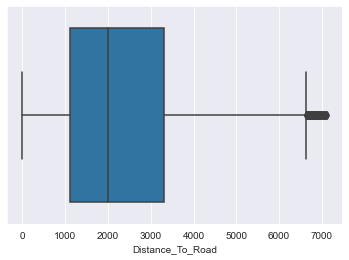

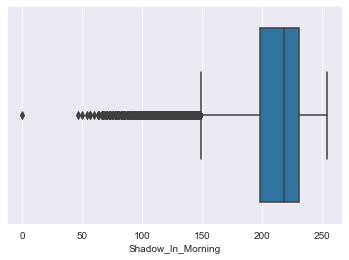

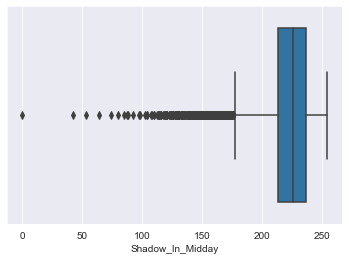

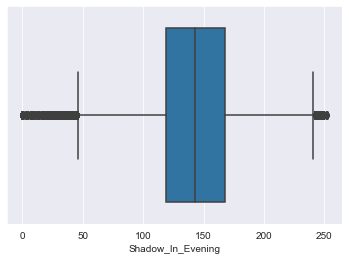

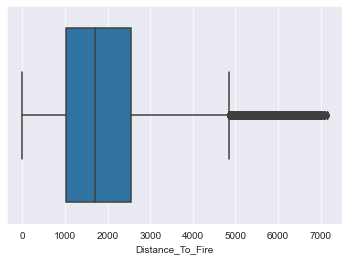

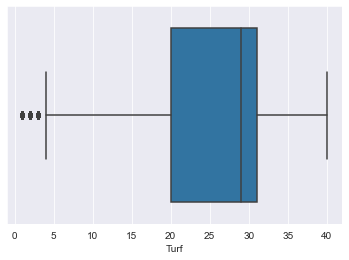

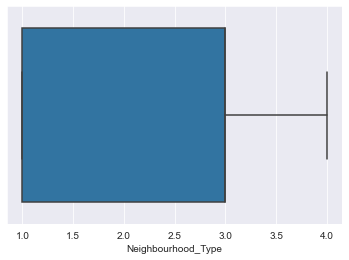

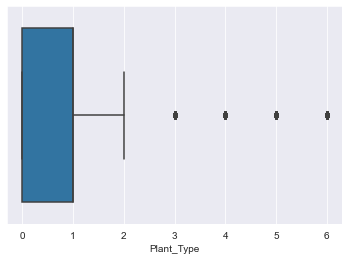

In [16]:
# Analysing the outliers
def outliers(data):
    for i in data.columns:   
        sns.boxplot(x=data[i])
        plt.show()
print('---------------')
print('Train Data')
print('---------------')   
outliers(data_train)
print('---------------')
print('Test Data')
print('---------------')
outliers(data_test)

In [17]:
# We can see that except for the attributes Neighbourhood Type and Aspect, all the other attributes are having 
# outliers - both in test and train data. They should be handled.

# BIVARIATE ANALYSIS OF EACH ATTRIBUTE WITH DEPENDENT VARIABLE

Train data
---------------


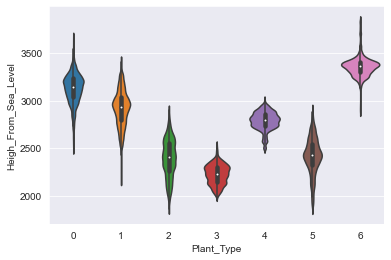

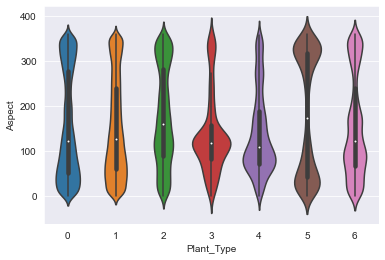

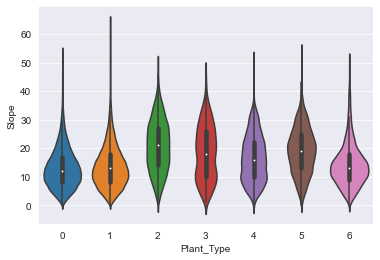

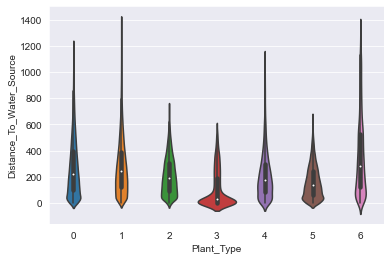

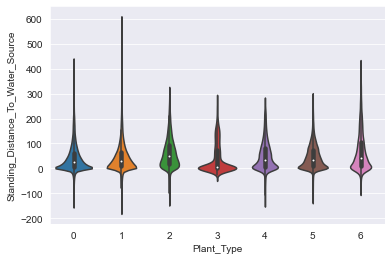

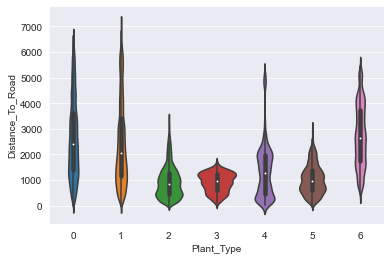

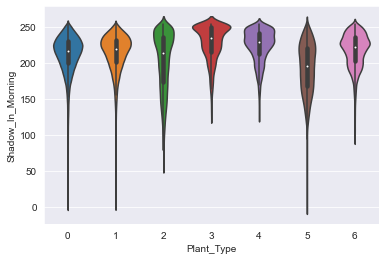

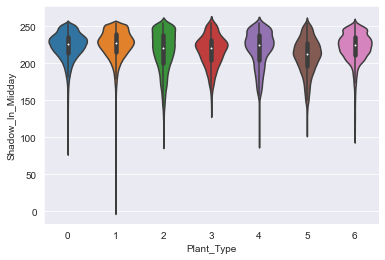

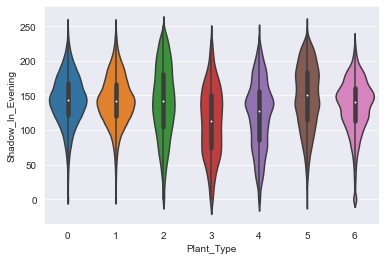

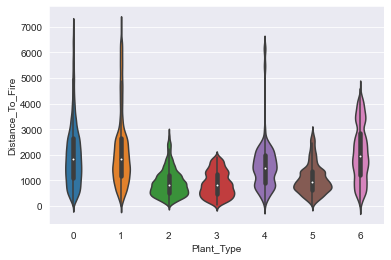

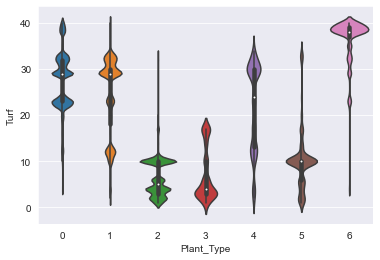

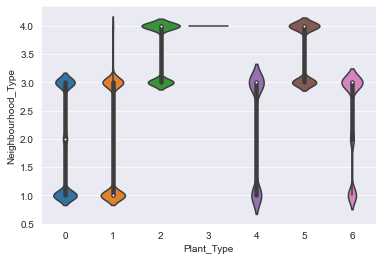

In [18]:
print('Train data')
print('---------------') 
for i in data_train.columns:
    if(i!='Plant_Type'):        
        sns.violinplot(x = 'Plant_Type', y = str(i), data = data_train)
        plt.show()

Test Data
---------------


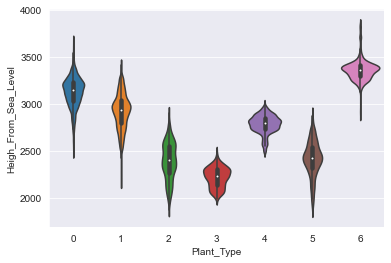

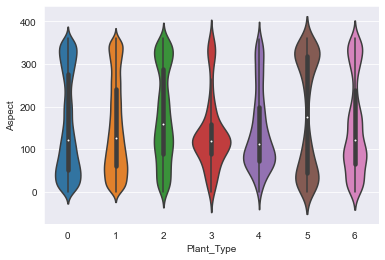

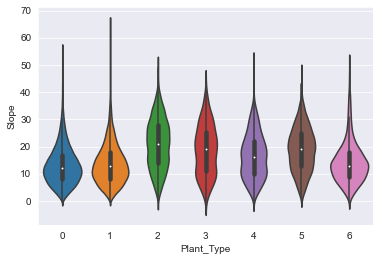

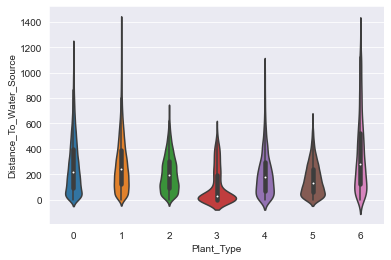

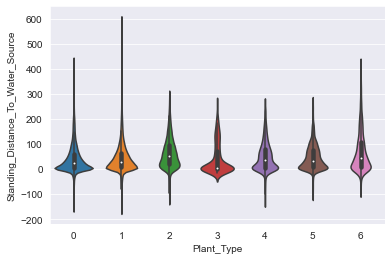

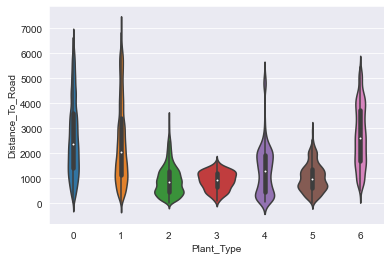

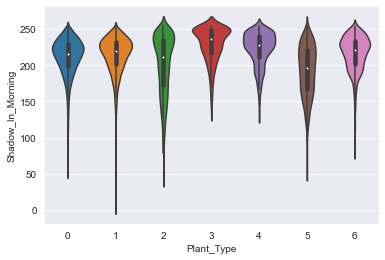

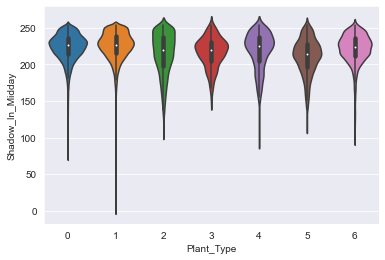

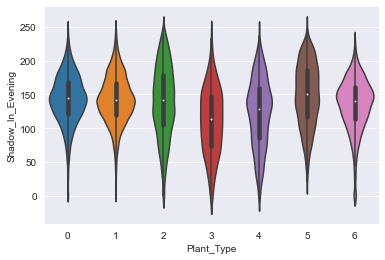

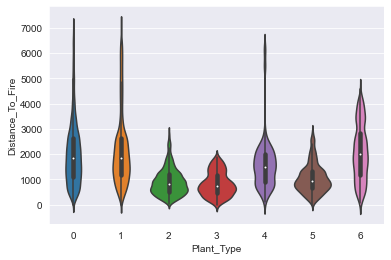

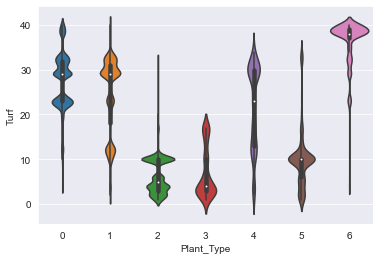

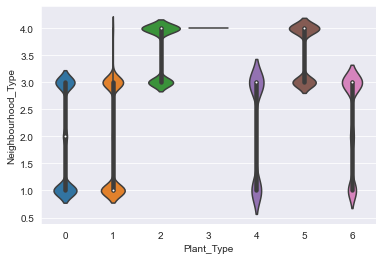

In [19]:
print('Test Data')
print('---------------') 
for i in data_test.columns:
    if(i!='Plant_Type'):        
        sns.violinplot(x = 'Plant_Type', y = str(i), data = data_test)
        plt.show()

In [20]:
# #  From the above violin plots we can analyse the following for both train and test data:
# Plant_Type - 6 has the mean value greater than the other plant types in the following categories:
#     Heigh_From_Sea_Level
#     Distance_To_Water_Source
#     Standing_Distance_To_Water_Source(Here plant type 2 also has almost equal value)
#     Distance_To_Road
#     Distance_To_Fire

# The plant_Type 5 has the highest mean value of the Aspect
# There is a slight variable of the values for all the plant_types for the attributes Shadow_In_Morning,
# Shadow_In_Midday,Shadow_in_Evening of which plant_Type 5 has gets less shadow in the morning while 
# plant_Type 3 has gets less shadow in the evening

# MULTIVARIATE ANALYSIS

---------------
Train Data
---------------


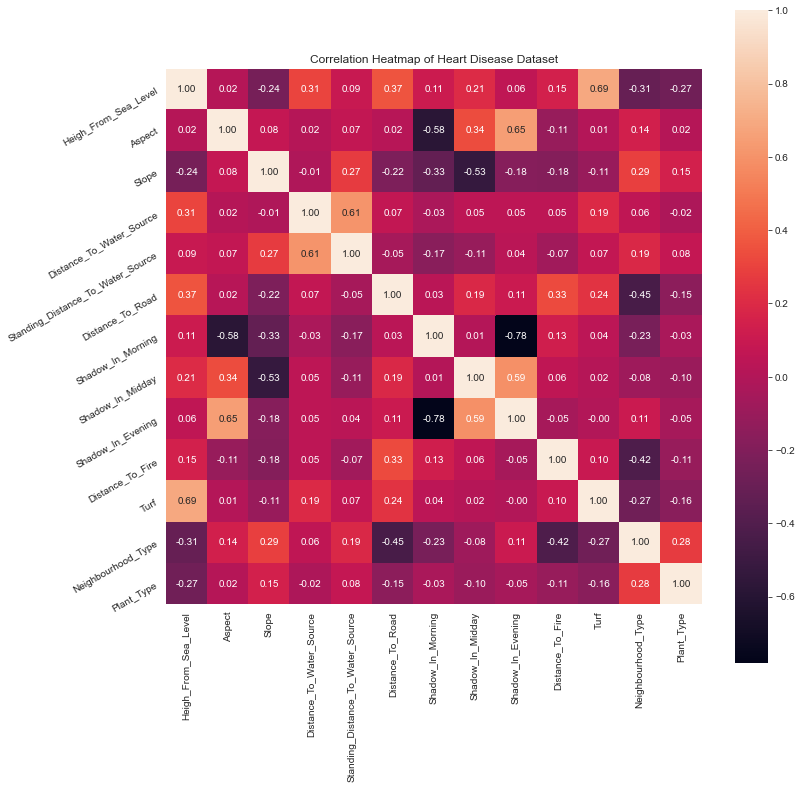

---------------
Test Data
---------------


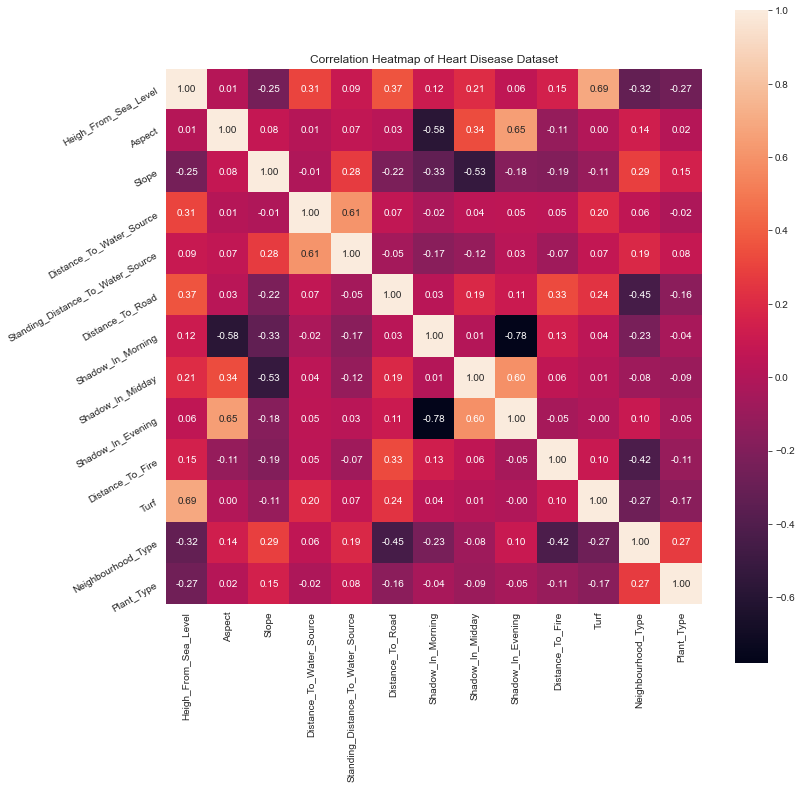

In [21]:
def corrmat(data):
    correlation=data.corr()
    plt.figure(figsize=(12,12))
    plt.title('Correlation Heatmap of Heart Disease Dataset')
    a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
    a.set_xticklabels(a.get_xticklabels(), rotation=90)
    a.set_yticklabels(a.get_yticklabels(), rotation=30)           
    plt.show()
print('---------------')
print('Train Data')
print('---------------')   
corrmat(data_train)
print('---------------')
print('Test Data')
print('---------------')
corrmat(data_test)

In [22]:
# For both train and Test data
# We can observe that 
# ->Aspect-Shadow_In_Morning have moderate negative correlation
# ->Slope-Shadow_In_Midday have moderate negative correlation
# ->Shadow_In_Morning-Shadow_In_Evening have high negative correlation
# ->The target variable plant_type is not highly correlated with any of the attributes

# Test Data

# Data Preprocessing Phase

# Handling Missing values in Shadow_In_Midday through Linear Regression

In [23]:
#Reference: https://towardsdatascience.com/the-tale-of-missing-values-in-python-c96beb0e8a9d

In [24]:
def getpred(data):
    main_train_data = data[data['Shadow_In_Midday'].notnull()]
    x_train = main_train_data.drop('Shadow_In_Midday', axis = 1).values
    y_train = main_train_data['Shadow_In_Midday'].values.reshape(-1,1)
    main_test_data = data[data['Shadow_In_Midday'].isnull()]
    x_test = main_test_data.drop('Shadow_In_Midday', axis = 1).values
    y_test = main_test_data['Shadow_In_Midday'].values.reshape(-1,1)
    regressor = LinearRegression()
    regressor.fit(x_train, y_train)
    pred = regressor.predict(x_test)
    return pred

In [25]:
# getting data_train ready
data_train_null=data_train[data_train['Shadow_In_Midday'].isnull()]
data_train_null=data_train_null.drop('Shadow_In_Midday', axis = 1)
data_train_null['Shadow_In_Midday'] = getpred(data_train.copy())
data_train_notnull=data_train[data_train['Shadow_In_Midday'].notnull()]
data_train = pd.concat([data_train_notnull,data_train_null],axis=0)

In [26]:
# getting data_test ready
data_test_null=data_test[data_test['Shadow_In_Midday'].isnull()]
data_test_null=data_test_null.drop('Shadow_In_Midday', axis = 1)
data_test_null['Shadow_In_Midday'] = getpred(data_test.copy())
data_test_notnull=data_test[data_test['Shadow_In_Midday'].notnull()]
data_test = pd.concat([data_test_notnull,data_test_null],axis=0)

# 3. Create key segments for all the plants (train + test) based on the average sunlightreceived throughout the day and their distance from waterbody to identify which segments of plants are getting enough sunlight and water vs which ones are not. This will help in mobilizing resources to track growth of trees appropriately 

According to the question,we need to find the groups of similar plants from the given set of plants.This makes it a Clustering problem and we will be using K-Means Clustering.We need to make the cluster of plants based on the amount of sunlight and the water it needs. <br>

In [27]:
# Calculating the average sunlight needed.
x=(data_train['Shadow_In_Morning']+data_train['Shadow_In_Midday']+data_train['Shadow_In_Evening'])/3
# Given the max values for each of the Shadow attributes is 255.SO, it is easy to analyse if we get the difference of this average
# value from the maximum average which is (255*3)/3=255.
x = 255-x
y=(data_train['Distance_To_Water_Source']**2+data_train['Standing_Distance_To_Water_Source']**2)**0.5
df=pd.DataFrame({'average_sunlight':x,'water_needed':y})

K-Means Clustering

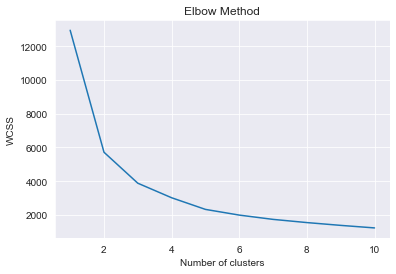

In [28]:
# Reference:https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
# K-Means Algorithm is sensitive to different scales.So, we need to normalize the data before performing the clustering
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the elbow method it is sufficient that the best k-value is 4 

In [29]:
classifier = KMeans(n_clusters=4)
type_predicted = classifier.fit_predict(df)
type_predicted

array([1, 0, 0, ..., 1, 1, 3], dtype=int32)

56857
149517
63546
194889


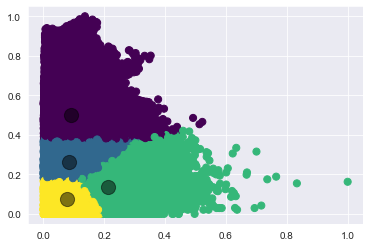

In [30]:

plt.scatter(df[:, 0], df[:, 1], c=type_predicted, s=50, cmap='viridis')

centers = classifier.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
for i in range(4):
    print(len(type_predicted[type_predicted==i]))

From the scatterplot we can see a negative trend of the points and this indicates that the plants might not need a lot of sunlight and water.

# Handling Outliers and Skewness

In [31]:
# Most of the data is left or right skewed.We have many transformation techniques like log transformation or sqrt or 
# cbrt or higher power tranformations as suggested in the article.Hence, choosing cube root.

In [32]:
# Reference:https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16
columns=['Turf', 'Neighbourhood_Type','Plant_Type']
 
for i in data_train.columns: 
        if(i not in columns ):
            skew_val = data_train[i].skew()
            res_trans = np.cbrt(data_train[i])
            if(res_trans.skew()<skew_val):
                data_train[i]= res_trans 
            Q1 = data_train[i].quantile(0.25)
            Q3 = data_train[i].quantile(0.75)
            IQR = Q3 - Q1
            data_train = data_train[data_train[i].apply(lambda x:(x >= Q1 - 1.5*IQR) and (x <= Q3 + 1.5*IQR))]

for i in data_test.columns: 
        if(i not in columns):
            skew_val = data_test[i].skew()
            res_trans = np.cbrt(data_test[i])
            if(res_trans.skew()<skew_val):
                data_test[i]= res_trans 
            Q1 = data_test[i].quantile(0.25)
            Q3 = data_test[i].quantile(0.75)
            IQR = Q3 - Q1
            data_test = data_test[data_test[i].apply(lambda x:(x >= Q1 - 1.5*IQR) and (x <= Q3 + 1.5*IQR))]

column=data_train.columns[~data_train.columns.isin(columns)]
scaler = MinMaxScaler()
data_train[column] = scaler.fit_transform(data_train[column])
data_test[column]= scaler.fit_transform(data_test[column])


# 2. Create a multi-class prediction model to predict the species of plant which will survive in the neighborhood of a given environment.

For this, we need to one hot encode the Neighbourhood_Type attribute to analyse what kind of species survives
in which particular neighbourhood

In [33]:
# Training
one_hot = pd.get_dummies(data_train['Neighbourhood_Type'],prefix='Neighbourhood_Type')
data_train = pd.concat([data_train, one_hot], axis=1)
data_train.drop(['Neighbourhood_Type'],axis=1)
# Testing

one_hot = pd.get_dummies(data_test['Neighbourhood_Type'],prefix='Neighbourhood_Type')
data_test = pd.concat([data_test, one_hot], axis=1)
data_test.drop(['Neighbourhood_Type'],axis=1)

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Plant_Type,Neighbourhood_Type_1,Neighbourhood_Type_2,Neighbourhood_Type_3,Neighbourhood_Type_4
1,0.536965,0.837130,0.729255,0.635767,0.970347,0.603220,0.243850,0.973976,0.916865,0.414042,13,1,0,0,1,0
2,0.398027,0.994588,0.643256,0.206475,0.456711,0.316775,0.320798,0.291909,0.633941,0.158536,31,1,0,0,1,0
3,0.581951,0.647663,0.360107,0.389807,0.636155,0.847177,0.866163,0.710943,0.459867,0.083091,29,1,1,0,0,0
4,0.665385,0.775100,0.729255,0.279619,0.540460,0.583142,0.639798,0.937314,0.662718,0.434832,33,0,0,0,1,0
5,0.596350,0.876357,0.322513,0.206475,0.353922,0.748303,0.499833,0.887973,0.813505,0.368428,23,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116174,0.460062,0.490694,0.544871,0.181610,0.243001,0.276341,0.820303,0.367790,0.280627,0.475637,32,1,0,0,1,0
116183,0.581951,0.561198,0.459667,0.585094,0.414334,0.868712,0.875258,0.531427,0.333598,0.440393,29,0,1,0,0,0
116187,0.538359,0.758244,0.360107,0.500680,0.594501,0.842429,0.745544,0.892483,0.645526,0.296223,29,1,1,0,0,0
116198,0.690066,0.997841,0.135372,0.482255,0.451303,0.925769,0.610331,0.665796,0.657012,0.319946,22,0,1,0,0,0


Train Data
---------------


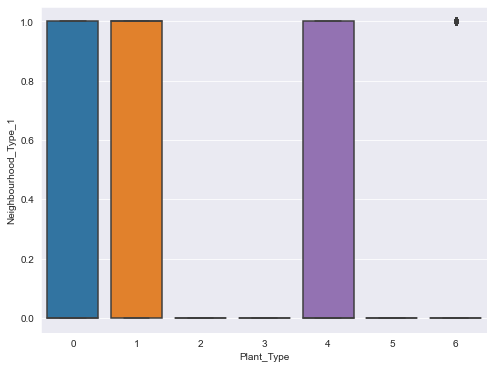

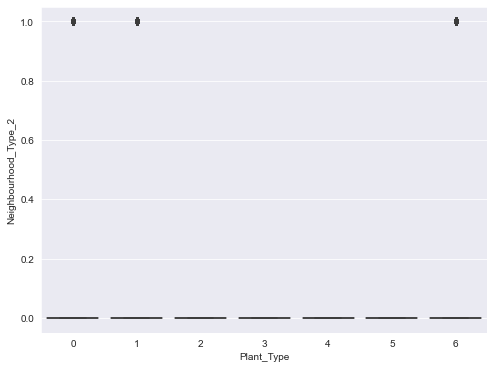

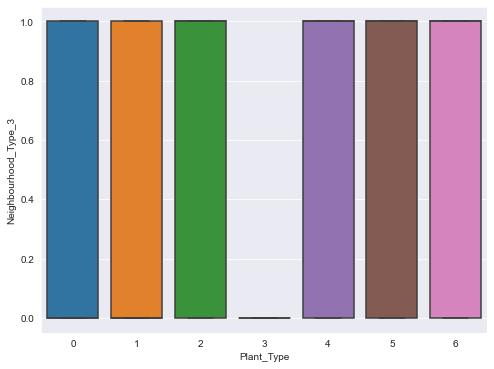

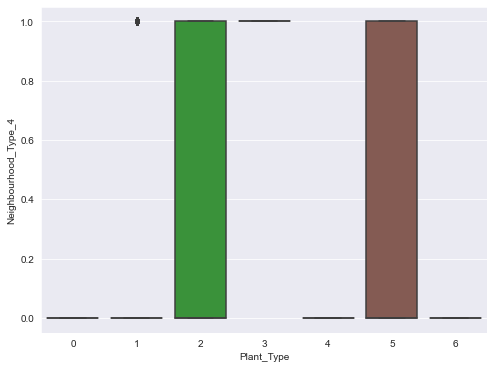

In [34]:
columns = ['Neighbourhood_Type_1','Neighbourhood_Type_2','Neighbourhood_Type_3','Neighbourhood_Type_4']
def survival_in_neighhood(data): 
    for i in columns:
        f, ax = plt.subplots(figsize=(8, 6))
        ax = sns.boxplot(x=data['Plant_Type'],y=i, data=data)
        plt.show()

# ['Assassin vine' ,'Ascomoid', 'Basidirond' ,'Kelpie', 'Myconid:','Hangman tree' 'Dark tree']
#  Plant_Type-after encoding: [1 0 2 5 6 4 3]
print('Train Data')
print('---------------')       
survival_in_neighhood(data_train)
# print('Test Data')
# print('---------------')
# survival_in_neighhood(data_test)



From the above plots we can analyse the following:

Species of plants that survive are:<br><br>
Neighbourhood_Type_1:<br>
Species:Ascomoid,Assassin vine,Hangman tree,Myconid:<br><br>
Neighbourhood_Type_2:<br>
Species:Ascomoid,Assassin vine,Myconid:<br><br>
Neighbourhood_Type_3:<br>
Species:Only Dark Tree won't survive.All other plants survive.<br><br>
Neighbourhood_Type_4:<br>
Species:Assassin vine,Basidirond,Dark tree,Kelpie<br><br>

# Data Preparation for Predictive Modeling

In [35]:
# x_train = data_train.drop(['Plant_Type'], axis = 1).values
# y_train = data_train['Plant_Type'].values.reshape(-1,1)
# x_test = data_test.drop(['Plant_Type'], axis = 1).values
# y_test = data_test['Plant_Type'].values.reshape(-1,1)
x_train=data_train.loc[:,'Heigh_From_Sea_Level':'Neighbourhood_Type_4']
y_train=data_train['Plant_Type']
x_test=data_test.loc[:,'Heigh_From_Sea_Level':'Neighbourhood_Type_4']
y_test=data_test['Plant_Type']

# Classification Model Predictions

Reference:https://www.kaggle.com/tolgahancepel/glass-classification-analysis-with-eda

<b>Logistic Regression</b>

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
classifier_lr = LogisticRegression()
start_time = time.time()
classifier_lr = classifier_lr.fit(x_train, y_train.ravel())
y_pred_lr_train = classifier_lr.predict(x_train)
lr_train_time = time.time() - start_time
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set Accuracy: ", accuracy_lr_train)
print("Training Time:",lr_train_time)
start_time = time.time()
y_pred_lr_test = classifier_lr.predict(x_test)
lr_test_time = time.time() - start_time
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set Accuracy: ", accuracy_lr_test)
print("Testing Time:",lr_test_time)

Training set Accuracy:  0.9981401402849085
Training Time: 13.096516132354736
Test set Accuracy:  0.9982148204454887
Testing Time: 0.012640953063964844


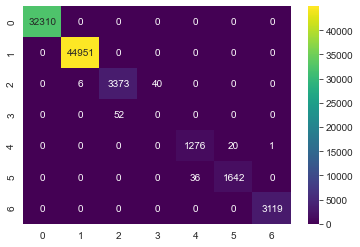

In [37]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

<b>Naive Bayes</b>

In [38]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
start_time = time.time()
classifier_nb.fit(x_train, y_train.ravel())
from sklearn.metrics import accuracy_score
y_pred_nb_train = classifier_nb.predict(x_train)
nb_train_time = time.time() - start_time
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set Accuracy: ", accuracy_nb_train)
print("Training Time:",nb_train_time)

start_time = time.time()
y_pred_nb_test = classifier_nb.predict(x_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
nb_test_time = time.time() - start_time
print("Test set Accuracy: ", accuracy_nb_test)
print("Testing Time:",nb_test_time)

Training set Accuracy:  1.0
Training Time: 0.4435000419616699
Test set Accuracy:  1.0
Testing Time: 0.0753779411315918


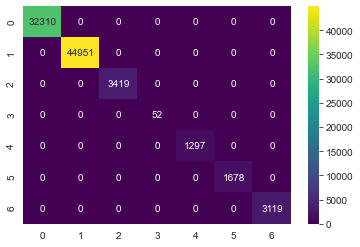

In [39]:
sns.heatmap(confusion_matrix(y_test, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

<b>K Nearest Neighbours</b>

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
start_time = time.time()
y_pred_knn_train = knn.predict(x_train)
knn_train_time = time.time() - start_time
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set Accuracy: ", accuracy_knn_train)
print("Training Time:",knn_train_time)

start_time = time.time()
y_pred_knn_test = knn.predict(x_test)
knn_test_time = time.time() - start_time
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set Accuracy: ", accuracy_knn_test)
print("Testing Time:",knn_test_time)

Training set Accuracy:  0.9999884301106371
Training Time: 148.52092003822327
Test set Accuracy:  0.9999769654251031
Testing Time: 38.507002115249634


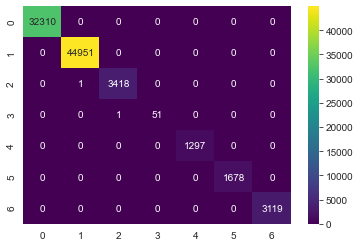

In [41]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

Random Forest Classifier

In [42]:
start_time = time.time()
clf = RandomForestClassifier()
start_time = time.time()
clf.fit(x_train, y_train)
y_pred_rf_train = clf.predict(x_train)
rf_train_time = time.time() - start_time
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set Accuracy: ", accuracy_rf_train)
print("Training Time:",rf_train_time)

start_time = time.time()
y_pred_rf_test = clf.predict(x_test)
rf_test_time = time.time() - start_time
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set Accuracy: ", accuracy_rf_test)
print("Testing Time:",rf_test_time)

Training set Accuracy:  1.0
Training Time: 35.995429277420044
Test set Accuracy:  0.9999884827125516
Testing Time: 0.6984899044036865


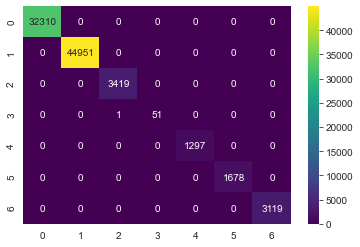

In [43]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

# Comparison of model using performance KPIs, Training & Testing Time

In [44]:
models = [('Logistic Regression', accuracy_lr_train, accuracy_lr_test,lr_train_time,lr_test_time),
    ('KNN', accuracy_knn_train, accuracy_knn_test,knn_train_time,knn_test_time),          
          ('Naive Bayes', accuracy_nb_train, accuracy_nb_test,nb_train_time,nb_test_time),          
          ('Random Forest Classification', accuracy_rf_train, accuracy_rf_test,rf_train_time,rf_test_time),          
         ]
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy','Training Time','Testing Time'])
predict

,Model,Training Accuracy,Test Accuracy,Training Time,Testing Time
0,Logistic Regression,0.998140,0.998215,13.096516,0.012641
1,KNN,0.999988,0.999977,148.520920,38.507002
2,Naive Bayes,1.000000,1.000000,0.443500,0.075378
3,Random Forest Classification,1.000000,0.999988,35.995429,0.698490


# Final predictive model recommendation

The tabular column above clearly shows the comparitive analysis of the models built based on the Key performance indicators like accuracy,train time and test time.Also,the confusion matrices shown for every model should also be taken into consideration. We can say that Random Forest and Naive Bayes - both the models yield one hundred percent accuracy.<br>
But,speaking in the perspective of this dataset,it has huge data to handle, in which case, Random Forest is the most preferred classifier as it efficiently handles the complex models.But if we take into perspective, the parameters like train & test time,then we can say, Naive Bayes is suggested classifier with one hundred percent accuracy on both test and train data.<br>

# Future Enhancements

Most of the time I spent was on analysing the dataset and its preprocessing.After building the models and gaining a very low accuracy,I had to further dig deep into handling the skewness,outliers and missing values in the model through various approaches like linear regression etc. instead of filling it with mean values.If given more time, then I would do Hyper parameter tuning for the models.Also, I would explore neural networks(multi-layer perceptron) and SVM as well.I would perform k-fold cross validation to assess the skill of machine learning models I have used.